In [1]:
import os
import sys
sys.path.append("..")
import phage_init

In [2]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std.p"), "rb" ) )

In [3]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [4]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [5]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [6]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [7]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:

train_X =numpy.concatenate((di_sc_train,tt_train),axis=1)
test_X  =numpy.concatenate((di_sc_test,tt_test),axis=1)
#train_X=di_sc_train
#test_X=di_sc_test
model_name='di_sc_p.h5'
print(train_X.shape)
print(test_X.shape)

(25000, 57)
(675, 57)


In [9]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9331458505496658039
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9371648
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16896506411246920889
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0"
]


In [10]:
print(train_X.shape[1])
f_num=train_X.shape[1]


57


In [11]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 57)                3306      
_________________________________________________________________
dropout_1 (Dropout)          (None, 57)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               11600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [20]:
model.fit(train_X, train_Y, epochs=200,verbose=1, batch_size=200)

Epoch 1/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6189 - acc: 0.7794
Epoch 2/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6137 - acc: 0.7815
Epoch 3/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6137 - acc: 0.7799
Epoch 4/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6177 - acc: 0.7783
Epoch 5/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6117 - acc: 0.7792
Epoch 6/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6154 - acc: 0.7786
Epoch 7/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6101 - acc: 0.7812
Epoch 8/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6073 - acc: 0.7843
Epoch 9/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6184 - acc: 0.7776
Epoch 10/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.6083 - a

25000/25000 [==============================] - 0s 17us/step - loss: 0.5804 - acc: 0.7882
Epoch 82/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5773 - acc: 0.7885
Epoch 83/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5642 - acc: 0.7915
Epoch 84/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5672 - acc: 0.7900
Epoch 85/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5751 - acc: 0.7868
Epoch 86/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5714 - acc: 0.7912
Epoch 87/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5721 - acc: 0.7892
Epoch 88/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5742 - acc: 0.7903
Epoch 89/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5639 - acc: 0.7935
Epoch 90/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5743 - acc: 

25000/25000 [==============================] - 0s 17us/step - loss: 0.5566 - acc: 0.7926
Epoch 161/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5578 - acc: 0.7962
Epoch 162/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5594 - acc: 0.7952
Epoch 163/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5597 - acc: 0.7924
Epoch 164/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5480 - acc: 0.7970
Epoch 165/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5517 - acc: 0.7964
Epoch 166/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5496 - acc: 0.7939
Epoch 167/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5537 - acc: 0.7952
Epoch 168/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.5643 - acc: 0.7944
Epoch 169/200
25000/25000 [==============================] - 0s 17us/step - loss: 0.541

In [21]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 33us/step
Accuracy: 77.78%


In [22]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,model_name))

In [23]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.84      0.87      0.85        93
     Minor capsid       0.84      0.73      0.78        52
        Baseplate       0.76      0.82      0.79       103
       Major tail       0.87      0.72      0.79        54
       Minor tail       0.88      0.83      0.86        36
           Portal       0.82      0.82      0.82        73
       Tail fiber       0.65      0.55      0.60        87
       Tail shaft       0.59      0.67      0.63        48
           Collar       0.59      0.76      0.66        49
Head-Tail joining       0.95      0.95      0.95        80

      avg / total       0.78      0.78      0.78       675



In [24]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 103, 0: 93, 6: 87, 9: 80, 5: 73, 3: 54, 1: 52, 8: 49, 7: 48, 4: 36})
[93, 52, 103, 54, 36, 73, 87, 48, 49, 80]



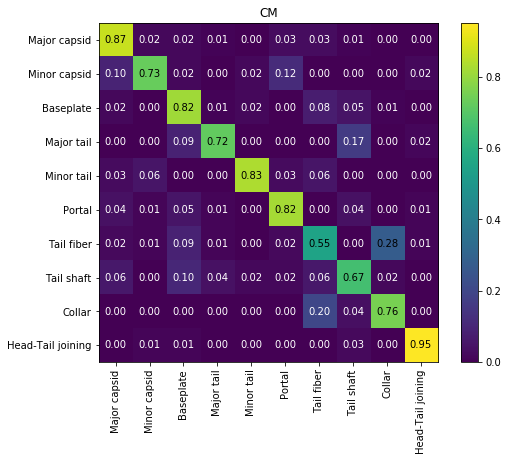

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.show()
CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.show()

In [18]:
print(numpy.where(~train_X.any(axis=0))[0])

[]


In [19]:
numpy.set_printoptions(threshold=numpy.nan)
print(std_total)

[8.32997820e-03 1.37449475e-03 4.99190984e-03 5.47386805e-03
 3.78220565e-03 7.07038847e-03 2.31475352e-03 4.53206128e-03
 4.57056446e-03 5.97101189e-03 2.58883879e-03 4.06275897e-03
 4.26517347e-03 4.28359267e-03 4.60686206e-03 5.54499637e-03
 6.04377591e-03 5.54704697e-03 2.28783510e-03 3.16883031e-03
 1.47330219e-03 5.99747990e-04 1.41224622e-03 1.48945399e-03
 1.07972006e-03 1.59141763e-03 9.41334404e-04 1.27900314e-03
 1.53810658e-03 1.47268982e-03 1.02650841e-03 1.17268710e-03
 1.18426283e-03 1.00552475e-03 1.76979644e-03 1.50122060e-03
 1.62129945e-03 1.63861386e-03 1.08072021e-03 1.16604740e-03
 5.09498643e-03 1.24172749e-03 4.31220611e-03 4.35011742e-03
 3.32721118e-03 5.17398977e-03 1.86171589e-03 4.30356185e-03
 4.05045915e-03 4.36138090e-03 2.43888703e-03 3.30863231e-03
 3.77163988e-03 2.68897563e-03 3.44011920e-03 4.03796001e-03
 4.16326061e-03 4.25548306e-03 1.99159086e-03 3.20562456e-03
 5.08172742e-03 1.99264364e-03 3.96476635e-03 4.51477528e-03
 3.17912660e-03 4.174658